In [26]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from glob import glob

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Resiging all the images
image_size = [224,224]

train_path = "Datasets/train"
test_path = "Dataset/test"

In [3]:
# Importing Resnet50
resnet = ResNet50(input_shape = image_size + [3], include_top = False, weights = "imagenet")

In [4]:
# Checking the summary
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
__________________________________________________________________________________________________


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable= False

In [6]:
## Useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [8]:
len(folders)

3

In [9]:
# Our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
# Re-defining the output layer
prediction = Dense(len(folders), activation = "softmax")(x)

# Create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# View the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimasation function to use
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Applying data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initiated for the training image
training_set = train_datagen.flow_from_directory('Datasets/train', 
                                                 target_size=(224,224), 
                                                 batch_size=32, 
                                                 class_mode="categorical")

Found 64 images belonging to 3 classes.


In [15]:
test_set = train_datagen.flow_from_directory('Datasets/test', 
                                                 target_size=(224,224), 
                                                 batch_size=32, 
                                                 class_mode="categorical")

Found 58 images belonging to 3 classes.


In [16]:
# fit the model
r = model.fit_generator(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set),
                       validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 24s 12s/step - loss: 9.2685 - accuracy: 0.2656 - val_loss: 5.5699 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 17s 9s/step - loss: 6.2618 - accuracy: 0.3125 - val_loss: 7.7088 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 18s 9s/step - loss: 6.2535 - accuracy: 0.4375 - val_loss: 13.5137 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 17s 9s/step - loss: 9.7791 - accuracy: 0.3906 - val_loss: 7.6013 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 18s 9s/step - loss: 4.6503 - accuracy: 0.3594 - val_loss: 4.8519 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 18s 9s/step - loss: 3.1064 - accuracy: 0.4531 - val_loss: 4.8686 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 18s 9s/step - loss: 4.7816 - accuracy: 0.375

In [17]:
r.history

{'loss': [9.268526077270508,
  6.261770248413086,
  6.253469467163086,
  9.779069900512695,
  4.650266647338867,
  3.1063592433929443,
  4.781615257263184,
  1.948643445968628,
  2.389535427093506,
  2.8898861408233643,
  1.8387267589569092,
  1.159562587738037,
  1.8094475269317627,
  1.20270574092865,
  1.3831216096878052,
  0.824198842048645,
  1.0694150924682617,
  0.9919570684432983,
  0.5817498564720154,
  0.886125922203064,
  0.5369873046875,
  0.6814266443252563,
  0.5097136497497559,
  0.5392695665359497,
  0.4547354578971863,
  0.4876301884651184,
  0.33720332384109497,
  0.35173964500427246,
  0.34305280447006226,
  0.3187650442123413,
  0.3181021809577942,
  0.4316074848175049,
  0.31073281168937683,
  0.2801054120063782,
  0.30246102809906006,
  0.3005774915218353,
  0.25465118885040283,
  0.2678832411766052,
  0.2568426728248596,
  0.24898549914360046,
  0.27738115191459656,
  0.26097261905670166,
  0.24894261360168457,
  0.2880287170410156,
  0.2810519337654114,
  0.2556

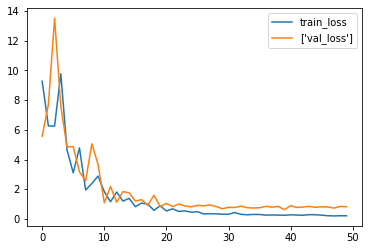

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot the losses
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label=['val_loss'])
plt.legend()
plt.show()
plt.savefig('Loss&val_loss')

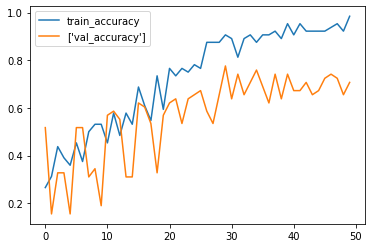

<Figure size 432x288 with 0 Axes>

In [19]:
# plotting the accuracy
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label=['val_accuracy'])
plt.legend()
plt.show()
plt.savefig('acc&val_acc')

In [20]:
# save the model as an h5 file
from tensorflow.keras.models import load_model
model.save('model1_resnet50.h5')

In [21]:
# Now make the prediction from the saved model
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[1.07861832e-02, 9.41252112e-01, 4.79617566e-02],
       [6.43879059e-04, 9.53653514e-01, 4.57025394e-02],
       [2.05417890e-02, 9.02451575e-01, 7.70066082e-02],
       [7.50550330e-01, 1.06431730e-02, 2.38806516e-01],
       [5.43136060e-01, 2.52177357e-03, 4.54342186e-01],
       [8.01776648e-01, 1.73097923e-01, 2.51255296e-02],
       [3.43884200e-01, 3.68581086e-01, 2.87534624e-01],
       [1.38462350e-01, 5.19660056e-01, 3.41877580e-01],
       [8.34600747e-01, 7.35352039e-02, 9.18639749e-02],
       [1.39396787e-01, 4.48351294e-01, 4.12251920e-01],
       [2.19504774e-01, 6.22911513e-01, 1.57583728e-01],
       [1.39240220e-01, 7.45387554e-01, 1.15372285e-01],
       [1.86769187e-03, 2.59116217e-02, 9.72220719e-01],
       [7.75994480e-01, 1.66518286e-01, 5.74872345e-02],
       [3.85793038e-02, 7.03883290e-01, 2.57537454e-01],
       [3.33266668e-02, 9.43653524e-01, 2.30198819e-02],
       [1.04764048e-02, 9.84108984e-01, 5.41459955e-03],
       [7.25053772e-02, 8.70389

In [23]:
# taking the indices which has the highest probability
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2], dtype=int64)

In [30]:
# Making prediction for our new dataset

# Loading an arbitrary image
img = image.load_img('Datasets/Test/mercedes/41.jpg', target_size=(224,224))

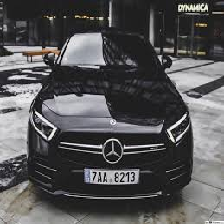

In [31]:
img

In [32]:
# Converting the image into an array
img = image.img_to_array(img)
img

array([[[ 45.,  45.,  45.],
        [ 31.,  31.,  31.],
        [ 32.,  32.,  32.],
        ...,
        [ 30.,  23.,  30.],
        [ 30.,  23.,  30.],
        [ 30.,  23.,  30.]],

       [[ 23.,  23.,  23.],
        [ 36.,  36.,  36.],
        [ 28.,  28.,  28.],
        ...,
        [ 62.,  57.,  63.],
        [ 62.,  57.,  64.],
        [ 62.,  57.,  64.]],

       [[107., 107., 107.],
        [126., 126., 126.],
        [ 83.,  83.,  83.],
        ...,
        [ 89.,  88.,  94.],
        [ 89.,  88.,  96.],
        [ 90.,  89.,  97.]],

       ...,

       [[165., 163., 164.],
        [171., 170., 168.],
        [184., 183., 181.],
        ...,
        [255., 253., 254.],
        [254., 252., 255.],
        [252., 250., 253.]],

       [[180., 180., 178.],
        [164., 165., 160.],
        [157., 158., 153.],
        ...,
        [203., 203., 203.],
        [208., 208., 208.],
        [216., 216., 216.]],

       [[171., 173., 168.],
        [169., 171., 166.],
        [164., 1

In [33]:
img.shape

(224, 224, 3)

In [34]:
img/255  # Need to do because our test dataset was also rescaled to 1./255
img

array([[[ 45.,  45.,  45.],
        [ 31.,  31.,  31.],
        [ 32.,  32.,  32.],
        ...,
        [ 30.,  23.,  30.],
        [ 30.,  23.,  30.],
        [ 30.,  23.,  30.]],

       [[ 23.,  23.,  23.],
        [ 36.,  36.,  36.],
        [ 28.,  28.,  28.],
        ...,
        [ 62.,  57.,  63.],
        [ 62.,  57.,  64.],
        [ 62.,  57.,  64.]],

       [[107., 107., 107.],
        [126., 126., 126.],
        [ 83.,  83.,  83.],
        ...,
        [ 89.,  88.,  94.],
        [ 89.,  88.,  96.],
        [ 90.,  89.,  97.]],

       ...,

       [[165., 163., 164.],
        [171., 170., 168.],
        [184., 183., 181.],
        ...,
        [255., 253., 254.],
        [254., 252., 255.],
        [252., 250., 253.]],

       [[180., 180., 178.],
        [164., 165., 160.],
        [157., 158., 153.],
        ...,
        [203., 203., 203.],
        [208., 208., 208.],
        [216., 216., 216.]],

       [[171., 173., 168.],
        [169., 171., 166.],
        [164., 1

In [35]:
# Expanding the dimensions of the image and pre-processing it for prediction
img = np.expand_dims(img, axis=0)
img_data = preprocess_input(img)
img_data.shape

(1, 224, 224, 3)

In [36]:
# Making the prediction
model.predict(img_data)

array([[5.5812882e-11, 1.0523959e-11, 1.0000000e+00]], dtype=float32)

In [37]:
a = np.argmax(model.predict(img_data), axis=1)

In [38]:
a

array([2], dtype=int64)